# Loading Dataset & Quick Overview
   * sklearn 波士頓房價預測資料集

In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 15
data = load_boston()
print(data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [16]:
print(data.data.shape) # data.data ==> Features
print(data.target.shape) # data.target ==> Label

(506, 13)
(506,)


In [17]:
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

# Plot Features V.S. Y
Can you explain the relation between other features with house prices?

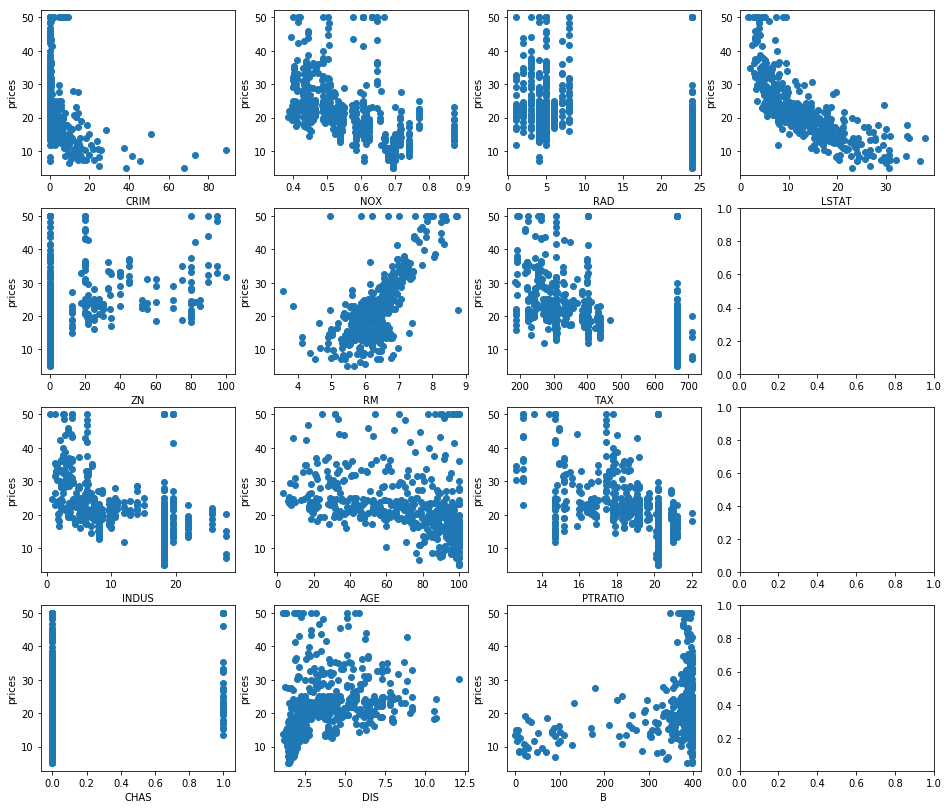

In [21]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
import math
fig, axes = plt.subplots(4, 4, figsize=(16,14))
for i in range(13):
    x_f = i%4
    y_f = math.floor((i)/4)
    axes[x_f, y_f].scatter(data.data[:,i], data.target) 
    axes[x_f, y_f].set_xlabel(features[i])
    axes[x_f, y_f].set_ylabel('prices')
plt.show()
"""
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
"""
pass

# Predicting Home Prices: Simple Linear Regression

In [5]:
'''Perform any data transformation here'''
# For example:
data.data = [np.hstack([data.data[i],np.sqrt(data.data[i]),np.log(data.data[i]+1)]) for i in range(data.data.shape[0])]

In [6]:
X = data.data
y = data.target

In [7]:
# import needed models in scikit-learn by yourself
# and fit a linear model using training dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state= 42, shuffle=True)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#model = '''train a linear model using training dataset here'''
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
# make prediction here
# y_pred = '''make prediction on testing dataset here'''
y_pred = model.predict(X_test)

RMS: 3.6392452083
R2:0.82


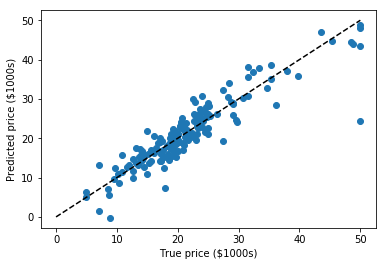

In [9]:
# visualize the result
%matplotlib inline
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50],'--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
print("RMS:", np.sqrt(np.mean((y_pred - y_test) ** 2)))
print('R2:%.2f'%metrics.r2_score(y_pred, y_test))

1.Try normalization 
2.Try other transformation
3.Use Lasso Regularization to see feature importance

In [10]:
# import needed models in scikit-learn by yourself
# and fit a linear model using training dataset
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.0001)
#model = '''train a linear model using training dataset here'''
model.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

RMS:3.68
R2:0.81


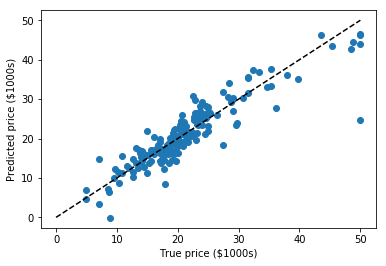

In [11]:
from sklearn import metrics
y_pred = model.predict(X_test)
# visualize the result
%matplotlib inline
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
print("RMS:%.2f"%np.sqrt(np.mean((y_pred - y_test) ** 2)))
print('R2:%.2f'%metrics.r2_score(y_pred, y_test))

In [12]:
type(metrics.r2_score(y_pred, y_test))

numpy.float64

In [13]:
print(' R2:%.2f'%metrics.r2_score(y_pred, y_test))

 R2:0.81
